In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
df = pd.read_excel('shop_all_history.xlsx')
df.shape

(748134, 1)

In [ ]:
df = pd.DataFrame(df.iloc[:,0].str.split(',').values.tolist())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0


In [5]:
columns = ['fullVisitorId','visitStartTime','date','deviceCategory',
           'isMobile','operatingSystem','browser','country','city','trafficSource',
           'trafficMedium','trafficCampaign','isFirstVisit','totalVisits','totalHits',
           'totalPageviews','totalTimeOnSite','productPagesViewed','addedToCart']
df.columns = columns
df.head()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'] - df['date'].dt.weekday.apply(timedelta)
df.head()

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart,week
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0,2020-10-12 00:00:00+00:00
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0,2021-04-26 00:00:00+00:00
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0,2021-03-15 00:00:00+00:00
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0,2021-03-29 00:00:00+00:00
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0,2021-05-17 00:00:00+00:00


In [17]:
df['addedToCart'] = df['addedToCart'].replace('', '0.0')
df['addedToCart'] = df['addedToCart'].astype(float)
df['addedToCart'].unique()

array([0., 1.])

In [13]:
df_weekly_uniques = df.groupby(['week', 'deviceCategory'], as_index=False)[['fullVisitorId']].nunique()
df_weekly_uniques = df_weekly_uniques.rename(columns={'fullVisitorId': 'unique_users'})
df_weekly_uniques

,week,deviceCategory,unique_users
0,2020-07-27 00:00:00+00:00,desktop,2776
1,2020-07-27 00:00:00+00:00,mobile,532
2,2020-07-27 00:00:00+00:00,tablet,89
3,2020-08-03 00:00:00+00:00,desktop,12355
4,2020-08-03 00:00:00+00:00,mobile,2276
...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,3348
131,2021-05-24 00:00:00+00:00,tablet,483
132,2021-05-31 00:00:00+00:00,desktop,1432
133,2021-05-31 00:00:00+00:00,mobile,531


In [18]:
df_atc = df.groupby(['week', 'deviceCategory'], as_index=False)[['addedToCart']].agg('sum')
df_atc

,week,deviceCategory,addedToCart
0,2020-07-27 00:00:00+00:00,desktop,258.0
1,2020-07-27 00:00:00+00:00,mobile,20.0
2,2020-07-27 00:00:00+00:00,tablet,8.0
3,2020-08-03 00:00:00+00:00,desktop,1032.0
4,2020-08-03 00:00:00+00:00,mobile,146.0
...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,163.0
131,2021-05-24 00:00:00+00:00,tablet,15.0
132,2021-05-31 00:00:00+00:00,desktop,135.0
133,2021-05-31 00:00:00+00:00,mobile,19.0


In [20]:
df_report = df_weekly_uniques.merge(df_atc, on=('week', 'deviceCategory'))
df_report

,week,deviceCategory,unique_users,addedToCart
0,2020-07-27 00:00:00+00:00,desktop,2776,258.0
1,2020-07-27 00:00:00+00:00,mobile,532,20.0
2,2020-07-27 00:00:00+00:00,tablet,89,8.0
3,2020-08-03 00:00:00+00:00,desktop,12355,1032.0
4,2020-08-03 00:00:00+00:00,mobile,2276,146.0
...,...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,3348,163.0
131,2021-05-24 00:00:00+00:00,tablet,483,15.0
132,2021-05-31 00:00:00+00:00,desktop,1432,135.0
133,2021-05-31 00:00:00+00:00,mobile,531,19.0


In [22]:
df_report_sum = df_report.groupby(['week'], as_index=False).agg('sum')
df_report_sum.head()

,week,deviceCategory,unique_users,addedToCart
0,2020-07-27 00:00:00+00:00,desktopmobiletablet,3397,286.0
1,2020-08-03 00:00:00+00:00,desktopmobiletablet,14991,1197.0
2,2020-08-10 00:00:00+00:00,desktopmobiletablet,14723,1351.0
3,2020-08-17 00:00:00+00:00,desktopmobiletablet,14256,1177.0
4,2020-08-24 00:00:00+00:00,desktopmobiletablet,13801,1103.0


In [28]:
sns.set_style('darkgrid')

<Axes: xlabel='week', ylabel='unique_users'>

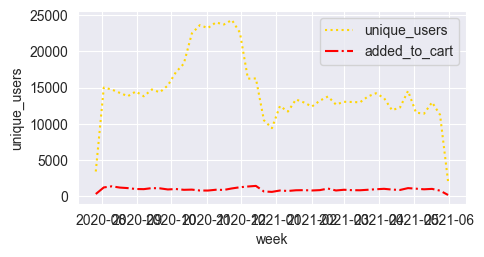

In [29]:
# by using lineplot its quite hard to tell are there any correlation
plt.figure(figsize=(5, 2.5))
sns.lineplot(df_report_sum, x='week', y='unique_users', color="#ffd504", label='unique_users', linestyle=':')
sns.lineplot(df_report_sum, x='week', y='addedToCart', color='red', label='added_to_cart', linestyle='-.')

<Axes: xlabel='unique_users', ylabel='addedToCart'>

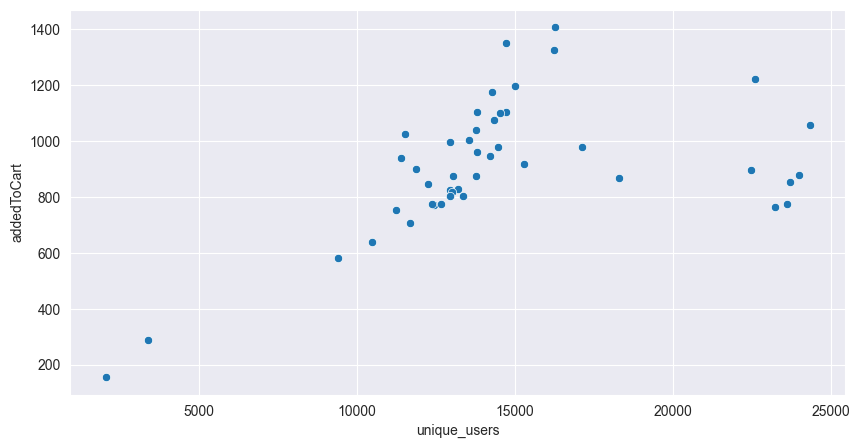

In [ ]:
# scatterplot is more sutable for that kind of data
plt.figure(figsize=(10,5))
sns.scatterplot(df_report_sum, x='unique_users', y='addedToCart')
# using this plot i can see that there is a trend from 10000 to 15000 unique users and added to cart numbers

<Axes: xlabel='unique_users', ylabel='addedToCart'>

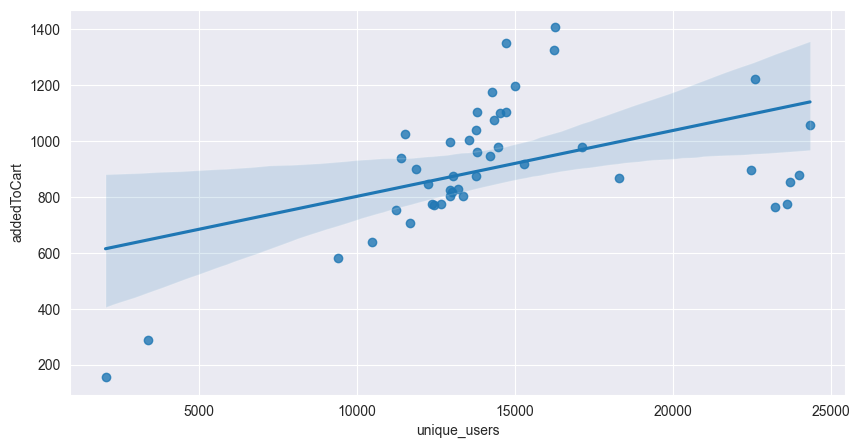

In [ ]:
# this is the same plot, but with trend line
plt.figure(figsize=(10,5))
sns.regplot(df_report_sum, x='unique_users', y='addedToCart')

<Axes: xlabel='unique_users', ylabel='addedToCart'>

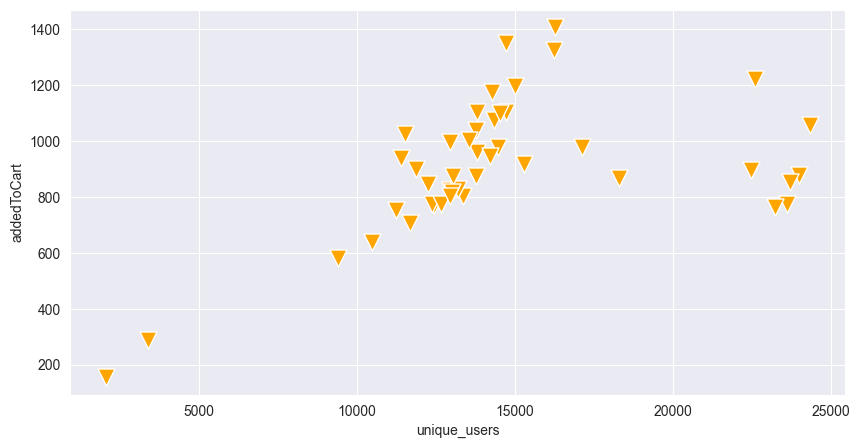

In [ ]:
# i can also customize scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(df_report, x='unique_users', y='addedToCart', marker='v', s=150, color='orange')
# s is for size and it is in %

<Axes: xlabel='unique_users', ylabel='addedToCart'>

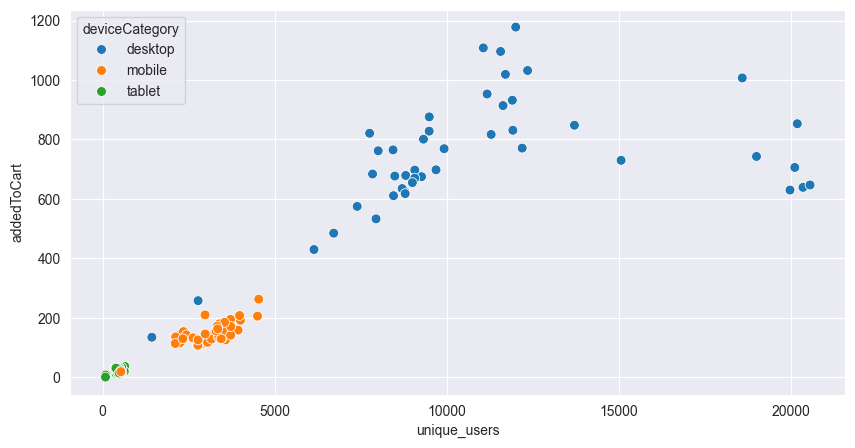

In [ ]:
# if i dont use color i can add hue argument
# i will also need a dataframe without agg
plt.figure(figsize=(10,5))
sns.scatterplot(df_report, x='unique_users', y='addedToCart', s=50, hue='deviceCategory')
# also here i can see that tablets are too close to each other 

In [56]:
df_report.head()

,week,deviceCategory,unique_users,addedToCart
0,2020-07-27 00:00:00+00:00,desktop,2776,258.0
1,2020-07-27 00:00:00+00:00,mobile,532,20.0
2,2020-07-27 00:00:00+00:00,tablet,89,8.0
3,2020-08-03 00:00:00+00:00,desktop,12355,1032.0
4,2020-08-03 00:00:00+00:00,mobile,2276,146.0


<Axes: xlabel='unique_users', ylabel='addedToCart'>

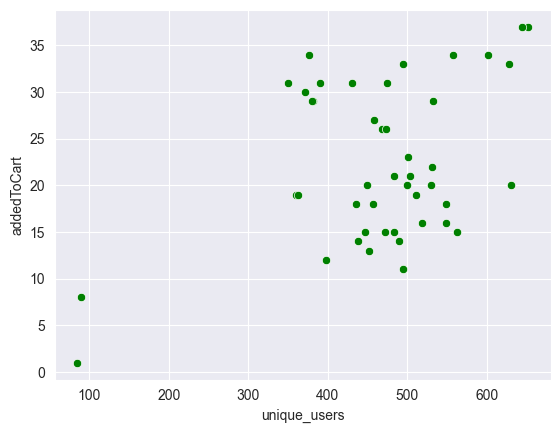

In [59]:
# so i make separate df with tablets
df_report_tablets = df_report[df_report['deviceCategory'] == 'tablet']
sns.scatterplot(df_report_tablets, x='unique_users', y='addedToCart', color='green')